<div style="text-align: center;">
    <h1>Classification Problems: Perceptron</h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>


In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix

## Perceptron Class

In [2]:
class perceptron:
  def __init__(self, num_epochs, eta=0.1):
    self.num_epochs = num_epochs
    self.theta0 = 0
    self.theta = None
    self.eta = eta

  def fit(self, X_train, y_train):

    n, dim = X_train.shape
    self.theta = np.zeros(dim)

    #X_train = np.array(X_train)
    #y_train = np.array(y_train)

    for _ in range(self.num_epochs):
      for i in range(n):
        #idx = randint.rvs(0, n-1, size=1)[0]
        linear_output = np.dot(self.theta, X_train[i]) + self.theta0
        y_i = 1 if linear_output >= 0 else 0

        update = self.eta * (y_train[i] - y_i)
        self.theta += update * X_train[i]
        self.theta0 += update

      #print("epoch: ", epoch)
    #print("theta: ", self.theta)
    #print("theta0: ", self.theta0)

  def predict(self, X_test):
    n, dim = X_test.shape
    y_pred = np.zeros(n)

    X_test = np.array(X_test)

    linear_output = np.matmul(X_test, self.theta) + self.theta0
    y_pred = np.where(linear_output >= 0, 1, 0)
    return y_pred

## Cancer Dataset

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
# Load dataset
data_frame = load_breast_cancer()
data = data_frame.data
target = data_frame.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
clf = perceptron(num_epochs=4, eta = 0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("percepton accuracy: ", acc)

# Evaluate model accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Perceptron Model Accuracy: {accuracy:.2f}')


percepton accuracy:  0.9824561403508771


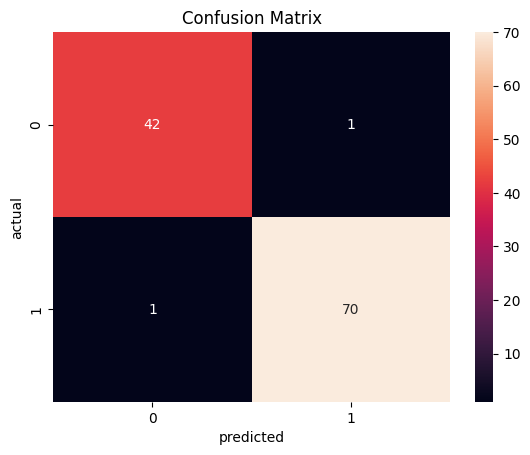

In [8]:
plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

In [9]:
from sklearn.linear_model import Perceptron

percepton accuracy:  0.9736842105263158


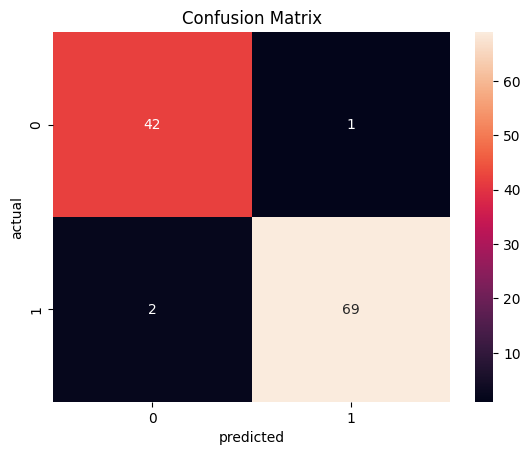

In [10]:
# Initialize and train Perceptron model
perceptron_ = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron_.fit(X_train, y_train)

# Make predictions
y_pred = perceptron_.predict(X_test)


cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("percepton accuracy: ", acc)


plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

## Wine Dataset

In [11]:
from sklearn.datasets import load_wine

In [12]:
# Load dataset
data_frame = load_wine()
data = data_frame.data
target = data_frame.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

y_train0 = np.where(y_train == 0, 0, 1)
y_train1 = np.where(y_train == 1, 0, 1)
y_train2 = np.where(y_train == 2, 0, 1)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
clf = perceptron(num_epochs=3, eta = 0.001)
clf.fit(X_train, y_train0)
y_pred0 = clf.predict(X_test)

clf.fit(X_train, y_train1)
y_pred1 = clf.predict(X_test)

clf.fit(X_train, y_train2)
y_pred2 = clf.predict(X_test)

In [15]:
y_pred = np.zeros(len(y_pred0))
y_pred[y_pred0 == 0] = 0
y_pred[y_pred1 == 0] = 1
y_pred[y_pred2 == 0] = 2

In [16]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("percepton accuracy: ", acc)

percepton accuracy:  1.0


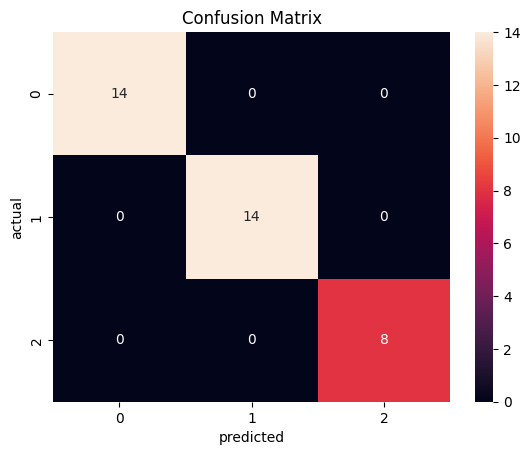

In [17]:
plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

## Iris Dataset

In [18]:
from sklearn.datasets import load_iris

In [19]:
data_frame = load_iris()
data = data_frame.data
target = data_frame.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

y_train0 = np.where(y_train == 0, 0, 1)
y_train1 = np.where(y_train == 1, 0, 1)
y_train2 = np.where(y_train == 2, 0, 1)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
clf = perceptron(num_epochs=5, eta = 0.01)
clf.fit(X_train, y_train0)
y_pred0 = clf.predict(X_test)
y_test0 = np.where(y_test == 0, 0, 1)

clf.fit(X_train, y_train1)
y_pred1 = clf.predict(X_test)
y_test1 = np.where(y_test == 1, 0, 1)

clf.fit(X_train, y_train2)
y_pred2 = clf.predict(X_test)
y_test2 = np.where(y_test == 2, 0, 1)

In [22]:
y_pred = np.zeros(len(y_pred0))
y_pred[y_pred0 == 0] = 0
y_pred[y_pred0 == 1] = 1
y_pred[y_pred2 == 0] = 2

percepton accuracy:  0.9666666666666667


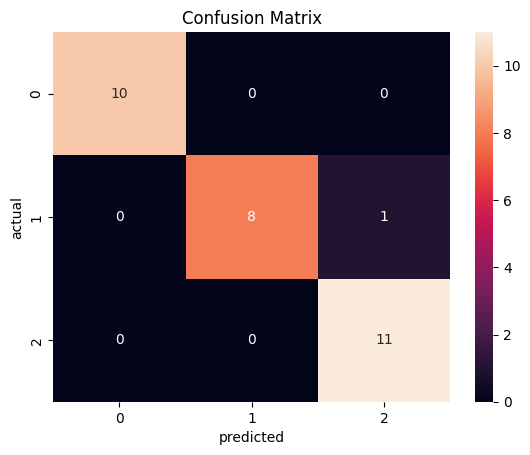

In [23]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("percepton accuracy: ", acc)

plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

percepton accuracy:  0.9333333333333333


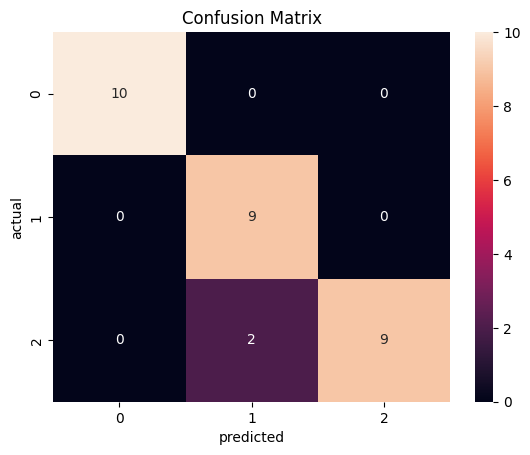

In [24]:
from sklearn.linear_model import Perceptron

# Initialize and train Perceptron model
perceptron_ = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
perceptron_.fit(X_train, y_train)

# Make predictions
y_pred = perceptron_.predict(X_test)


cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("percepton accuracy: ", acc)


plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()